In [ ]:
# Import required packages
import matplotlib.pyplot as plt
import pandas as pd
from datacube import Datacube
from odc.ui import DcViewer
from pprint import pprint
from odc.geo import resxy_

# Set some configurations for displaying tables nicely
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', None)

In [2]:
# Connect to datacube
dc = Datacube(app="Products_and_measurements")

## Product Discovery

In [3]:
# List Products
dc.list_products()

/home/venv/lib/python3.12/site-packages/datacube/utils/py.py:62: ODC2DeprecationWarning: Call to deprecated function (or staticmethod) grid_spec. (The Grid Workflow is deprecated. This property may return an (optional) odc-geo GridSpec in future.)
-- Deprecated since version 1.9.0.
  value = obj.__dict__[self.func.__name__] = self.func(obj)


,name,description,license,default_crs,default_resolution
name,,,,,
s2_l2a,s2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance) and converted to Cloud Optimized GeoTIFFs",None,None,None


In [4]:
# List measurements
dc.list_measurements()

name   dtype units  nodata  \
product measurement                                   
s2_l2a  coastal       coastal  uint16     1       0   
        blue             blue  uint16     1       0   
        green           green  uint16     1       0   
        red               red  uint16     1       0   
        rededge1     rededge1  uint16     1       0   
        rededge2     rededge2  uint16     1       0   
        rededge3     rededge3  uint16     1       0   
        nir               nir  uint16     1       0   
        nir08           nir08  uint16     1       0   
        nir09           nir09  uint16     1       0   
        swir16         swir16  uint16     1       0   
        swir22         swir22  uint16     1       0   
        scl               scl   uint8     1       0   
        aot               aot  uint16     1       0   
        wvp               wvp  uint16     1       0   

                                               aliases  \
product measurement                                      
s2_l2a  coastal        [band_01, B01, coastal_aerosol]   
        blue                            [band_02, B02]   
        green                    [band_03, B03, green]   
        red                        [band_04, B04, red]   
        rededge1            [band_05, B05, red_edge_1]   
        rededge2            [band_06, B06, red_edge_2]   
        rededge3            [band_07, B07, red_edge_3]   
        nir                 [band_08, B08, nir, nir_1]   
        nir08        [band_8a, B8A, nir_narrow, nir_2]   
        nir09             [band_09, B09, water_vapour]   
        swir16         [band_11, B11, swir_1, swir_16]   
        swir22         [band_12, B12, swir_2, swir_22]   
        scl                            [mask, SCL, qa]   
        aot           [aerosol_optical_thickness, AOT]   
        wvp          [scene_average_water_vapour, WVP]   

                                                                                                                                                                                                            flags_definition  
product measurement                                                                                                                                                                                                           
s2_l2a  coastal                                                                                                                                                                                                          NaN  
        blue                                                                                                                                                                                                             NaN  
        green                                                                                                                                                                                                            NaN  
        red                                                                                                                                                                                                              NaN  
        rededge1                                                                                                                                                                                                         NaN  
        rededge2                                                                                                                                                                                                         NaN  
        rededge3                                                                                                                                                                                                         NaN  
        nir                                                                                    

## Dataset Searching & Querying

### Finding Dataset

In [5]:
datasets = dc.find_datasets(product="s2_l2a", limit=1)
datasets

[Dataset <id=87274776-b896-581d-a881-91a190e9fd99 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50LKR_20200331_0_L2A>]

We can also search for datasets within a specific spatial extent or time period. To do this, we supply a spatiotemporal query (i.e. a range of x- and y-coordinates defining the spatial area to load, and a range of times).

`dc.find_datasets()` will then return a subset of datasets that match this query:

In [6]:
datasets = dc.find_datasets(
    product="s2_l2a",
    x=(114, 116),
    y=(-7, -9),
    time=("2021-01-01", "2021-01-02")
)
datasets

[Dataset <id=4e14c456-7b9d-5e46-b6fe-69485f4ab8e0 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50MKS_20210102_0_L2A>,
 Dataset <id=00fa0c05-bfda-5b6a-b290-ac6972843e9d product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50LKR_20210102_0_L2A>,
 Dataset <id=cd98f87b-b4d0-596f-8834-46089d4da568 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50LLR_20210102_1_L2A>,
 Dataset <id=772206e2-c9ab-54d4-b939-5ab7fbe67cef product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50MKS_20210102_1_L2A>,
 Dataset <id=93a97cb9-768e-53aa-979f-ee55b46fb740 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50LLR_20210102_0_L2A>,
 Dataset <id=50d9a3ad-ef95-58fb-a7bc-a77f42f0a69c product=s2_l2a location=https://earth-search.aws.element84.com/v1/coll

### Inspecting Dataset

In [7]:
datasets[0].uris

/tmp/ipykernel_4793/1531116856.py:1: ODC2DeprecationWarning: Call to deprecated function (or staticmethod) uris. (Multiple locations are now deprecated. Please use the 'uri' attribute instead.)
-- Deprecated since version 1.9.0.
  datasets[0].uris


['https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50MKS_20210102_0_L2A']

In [8]:
datasets[0].measurements

{'aot': {'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/M/KS/2021/1/S2A_50MKS_20210102_0_L2A/AOT.tif'},
 'nir': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/M/KS/2021/1/S2A_50MKS_20210102_0_L2A/B08.tif'},
 'red': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/M/KS/2021/1/S2A_50MKS_20210102_0_L2A/B04.tif'},
 'scl': {'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/M/KS/2021/1/S2A_50MKS_20210102_0_L2A/SCL.tif'},
 'wvp': {'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/M/KS/2021/1/S2A_50MKS_20210102_0_L2A/WVP.tif'},
 'blue': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/M/KS/2021/1/S2A_50MKS_20210102_0_L2A/B02.tif'},
 'green': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/M/KS

In [9]:
datasets[0].crs

CRS('EPSG:32750')

In [10]:
datasets[0].transform

Affine(109800.0, 0.0, 199980.0,
       0.0, -109800.0, 9200020.0)

In [11]:
# attributes and methods that are available
ds0 = datasets[0]
dir(ds0.metadata)

['cloud_cover',
 'creation_dt',
 'creation_time',
 'dataset_maturity',
 'format',
 'grid_spatial',
 'id',
 'instrument',
 'label',
 'lat',
 'lon',
 'measurements',
 'platform',
 'product_family',
 'region_code',
 'sources',
 'time']

In [12]:
ds0.metadata.cloud_cover

63.679352

In [13]:
getattr(ds0.metadata, 'cloud_cover')

63.679352

In [14]:
ds0.metadata.id

'4e14c456-7b9d-5e46-b6fe-69485f4ab8e0'

In [15]:
ds0.metadata.lat

Range(begin=-8.226787741654817, end=-7.229183594051619)

In [16]:
ds0.metadata.lat.begin

-8.226787741654817

In [17]:
# pprint(vars(ds0))

## Load Data
Once you know the products or datasets that you are interested in, you can load data using `dc.load()`.

In [46]:
datasets_2 = dc.find_datasets(
    product="s2_l2a",
    x=(114, 116),
    y=(-7, -9),
    time=("2021-01-01", "2021-01-31"),
    cloud_cover=(0, 40),
)
datasets_2

[Dataset <id=575cad11-c321-5511-92ab-88c003f79754 product=s2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50MLT_20210122_0_L2A>]

In [47]:
ds2 = dc.load(
    datasets=datasets_2,
    measurements=["red", "green", "blue"],
    output_crs="EPSG:32750",
    resolution=resxy_(10, 10),
    align=(0, 0)
)

In [48]:
ds2

<xarray.Dataset> Size: 724MB
Dimensions:      (time: 1, y: 10980, x: 10980)
Coordinates:
  * time         (time) datetime64[ns] 8B 2021-01-22T02:39:44.726000
  * y            (y) float64 88kB 9.19e+06 9.19e+06 9.19e+06 ... 9.3e+06 9.3e+06
  * x            (x) float64 88kB 3e+05 3e+05 3e+05 ... 4.098e+05 4.098e+05
    spatial_ref  int32 4B 32750
Data variables:
    red          (time, y, x) uint16 241MB 2366 2366 2386 2388 ... 344 390 399
    green        (time, y, x) uint16 241MB 2608 2592 2602 2568 ... 456 415 489
    blue         (time, y, x) uint16 241MB 2862 2872 2896 2878 ... 527 436 507
Attributes:
    crs:           EPSG:32750
    grid_mapping:  spatial_ref

We can see that `dc.load` has returned an `xarray.Dataset` containing data from our two input datasets. 

> This `xarray.Dataset` includes:  
> **Dimensions**  
> This header identifies the number of timesteps returned (time: 2) as well as the number of resulting pixels in the `x` and `y` directions.
> 
> **Coordinates**  
> - time identifies the time attributed to each returned timestep.
> - x and y provide coordinates for each pixel within the returned data.  
> - spatial_ref provides information about the spatial grid used to load the data
> 
>**Data variables**  
> These are the measurements available for the loaded product.
> For every timestep (time) returned by the query, the measured value at each pixel (y, x) is returned as an array for each measurement.
> Each data variable is itself an `xarray.DataArray` object.
> 
> **Attributes**  
> Other important metadata or attributes for the loaded data

We can also inspect our loaded data by plotting it:

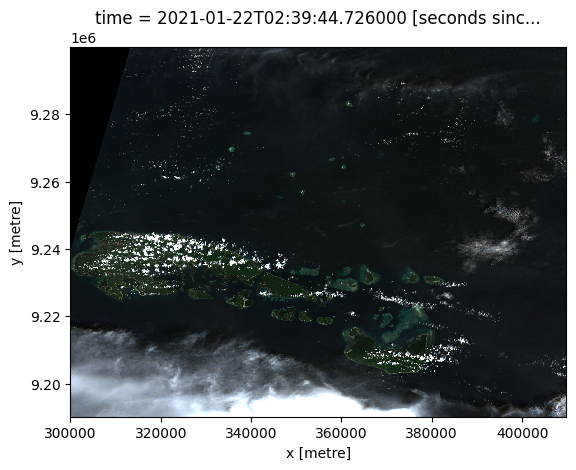

In [49]:
ds_sample = ds2.isel(time=0).isel(x=slice(0, None, 10), y=slice(0, None, 10))
ds_sample[["red", "green", "blue"]].to_array().plot.imshow(robust=True)